In [2]:
import pandas as pd
import semopy as sm
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
lat_lon_list = [(45, 0), (42, 13), (68,25)]

df1 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[0][0]}_lon_{lat_lon_list[0][1]}.csv", index_col = 0)
df2 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.csv", index_col = 0)
df3 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[2][0]}_lon_{lat_lon_list[2][1]}.csv", index_col = 0)


In [4]:
# sns.pairplot(df1)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[0][0]}_lon_{lat_lon_list[0][1]}.png")

In [5]:
# sns.pairplot(df2)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.png")

In [6]:
# sns.pairplot(df3)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[2][0]}_lon_{lat_lon_list[2][1]}.png")

# What we are interested in?
# This is to test semopy, we will go to more detailed graphs in later part

srrad_spring, tp_spring, temp_spring -> lai_spring
srrad_summer, tp_summer, temp_summer -> lai_summer

lai_spring -> lai_summer

In [98]:
mod = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
lai_summer ~ lai_spring
lai_summer ~ ssrd_summer + temp_summer
swvlall_summer ~ lai_spring + tp_summer + ssrd_summer + temp_summer
lai_summer ~ swvlall_summer
"""
model = sm.Model(mod)

In [115]:
df = df2
model.fit(df)

SolverResult(fun=2.55152124517835, success=True, n_it=13, x=array([ 0.11192126,  0.44081246,  0.44448401,  0.18673735, -0.10232755,
        0.11070462,  0.21409389, -0.17248207,  0.41205057,  0.42246663,
       -0.63455996,  0.57848636,  0.94680988,  0.58536572]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

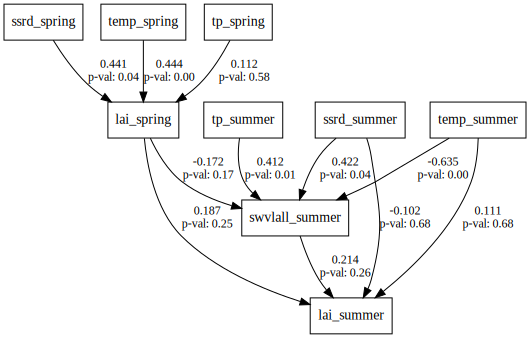

In [116]:
sm.semplot(model, f"images/sem_fit_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.png")

In [117]:
sm.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,31,42,94.406286,2.521489e-08,242.305032,0.683451,0.610382,0.472131,0.610382,0.571128,0.23836,22.896958,45.449808,2.551521


In [118]:
df_pred = df.copy()
df_pred["lai_summer"] = float('nan')

pred_lai_summer = model.predict(df_pred).lai_summer


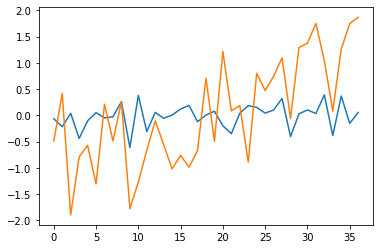

In [119]:
plt.plot(pred_lai_summer.values)
plt.plot(df.lai_summer.values)
